In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ttnt-data123/train.csv
/kaggle/input/ttnt-data123/test.csv


In [2]:
train_df = pd.read_csv("/kaggle/input/ttnt-data123/train.csv")
test_df = pd.read_csv("/kaggle/input/ttnt-data123/test.csv")

In [3]:
train_df

,long,lat,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B10,B11,B12,label
0,105.789453,19.409841,1550.0,1351.5,1223.5,1273.0,1231.0,1419.0,1586.5,1478.5,1742.0,299.0,9.5,2191.5,2011.5,residentialland
1,105.785023,19.740696,1539.0,1458.0,1337.5,1193.0,1306.5,1831.0,2111.5,2202.5,2322.0,387.5,10.5,2361.5,2005.5,residentialland
2,106.021096,19.982862,1617.0,1346.0,1221.0,1021.0,1108.0,1493.0,1709.0,1528.0,1751.0,264.0,9.0,825.0,398.0,aquaculture
3,105.771186,19.321312,1708.5,1474.0,1374.5,1115.0,1060.5,1119.0,1228.5,1046.5,1150.0,141.5,7.5,766.0,539.5,open_water
4,105.802570,19.817704,1856.5,1593.0,1549.5,1436.0,1618.5,2083.0,2303.5,2226.0,2489.0,372.5,11.0,2076.0,1443.5,residentialland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11395,105.710046,19.891983,1464.0,1273.0,1158.0,871.5,1168.0,2165.0,2728.5,2464.0,2864.0,340.0,12.0,1341.0,596.0,ricepaddies
11396,105.077327,20.490431,1103.5,783.5,604.0,370.0,648.5,1537.0,1862.5,1547.5,2080.0,576.5,9.0,965.0,386.5,forest
11397,105.821635,19.618941,1602.5,1226.5,1092.0,1182.5,1337.0,1740.0,1970.5,1661.5,2125.0,335.0,11.5,2318.5,2170.5,residentialland
11398,106.024398,19.991775,1599.0,1338.0,1249.0,1117.0,1145.0,1224.0,1401.0,1391.0,1365.0,199.0,9.0,807.0,442.0,aquaculture


In [4]:
from sklearn.preprocessing import LabelEncoder
def preprocess_data(df):
    # Drop long, lat
    df.drop(columns=["Unnamed: 0", "long", "lat"], inplace=True, errors='ignore') 
    
    # Encode cột label 
    le = LabelEncoder()
    df['label'] = le.fit_transform(df['label'])
    print(f"Label encoding for {'label'}:")
    for label, num in zip(le.classes_, range(len(le.classes_))):
        print(f"{label} -> {num}")

In [5]:
preprocess_data(train_df)
preprocess_data(test_df)

Label encoding for label:
aquaculture -> 0
barrenland -> 1
cropland -> 2
forest -> 3
grassland -> 4
open_water -> 5
residentialland -> 6
ricepaddies -> 7
shrubland -> 8
wetlands -> 9
Label encoding for label:
aquaculture -> 0
barrenland -> 1
cropland -> 2
forest -> 3
grassland -> 4
open_water -> 5
residentialland -> 6
ricepaddies -> 7
shrubland -> 8
wetlands -> 9


# Thêm feature (optional)

In [6]:
def add_features(df_origin):
    df = df_origin.copy()
    df['NDVI'] = (df['B8'] - df['B4']) / (df['B8'] + df['B4'])
    df['NDWI'] = (df['B3'] - df['B8']) / (df['B3'] + df['B8'])
    df['NDMI'] = (df['B8A'] - df['B11']) / (df['B8A'] + df['B11'])
    df['NDBI'] = (df['B11'] - df['B8']) / (df['B11'] + df['B8'])
    df['BSI'] = ((df['B12'] + df['B8']) - (df['B4'] + df['B3'])) / ((df['B12'] + df['B8']) + (df['B4'] + df['B3']))
    # df['EVI'] = 2.5 * (df['B8'] - df['B4']) / (df['B8'] + 6 * df['B4'] - 7.5 * df['B2'] + 1) # Trường này có - ở mẫu nên khả năng thành NaN hoặc inf là tương đối cao
    L = 0.5
    df['SAVI'] = ((df['B8'] - df['B4']) * (1 + L)) / (df['B8'] + df['B4'] + L) # (Soil Adjusted Vegetation Index) – NDVI hiệu chỉnh ảnh hưởng của đất
    return df

In [7]:
backup_train_df = train_df.copy()
backup_test_df = test_df.copy()

In [8]:
add_features(train_df)
add_features(test_df)

,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B10,B11,B12,label,NDVI,NDWI,NDMI,NDBI,BSI,SAVI
0,1317.0,1047.0,968.0,708.0,926.0,2000.0,2491.0,2269.0,2736.0,380.0,10.0,1780.0,936.0,2,0.524353,-0.401915,0.211692,-0.120771,0.313255,0.786398
1,1157.0,870.0,786.0,440.0,738.0,1715.0,2160.0,2609.0,2549.0,498.0,9.0,1236.0,446.0,3,0.711381,-0.536966,0.346896,-0.357087,0.427237,1.066896
2,1505.0,1260.0,1244.0,1045.0,1201.0,1424.0,1645.0,1369.0,1658.0,165.0,8.0,736.0,335.0,7,0.134217,-0.047838,0.385129,-0.300713,-0.146506,0.201284
3,1581.0,1358.5,1341.0,1320.0,1349.0,1670.0,1952.0,1673.0,2004.0,211.0,9.0,996.5,556.0,7,0.117942,-0.110153,0.335777,-0.253418,-0.088344,0.176883
4,1356.0,1059.0,901.0,588.0,831.0,2045.0,2640.5,2433.0,2969.0,394.0,9.5,1282.0,524.5,3,0.610725,-0.459508,0.396848,-0.309825,0.330260,0.915936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845,1471.0,1309.0,1276.0,988.0,1181.0,2161.5,2688.5,2039.5,2995.0,408.5,8.5,1706.5,734.0,4,0.347316,-0.230282,0.274061,-0.088895,0.101141,0.520888
2846,1497.5,1296.0,1174.0,865.5,1094.5,2199.0,2941.0,2655.0,3174.0,334.5,10.0,1379.0,602.5,7,0.508308,-0.386785,0.394246,-0.316311,0.229941,0.762354
2847,1423.0,1056.0,883.0,627.0,726.0,1051.0,1253.0,1272.0,1178.0,173.0,8.0,596.0,329.0,9,0.339652,-0.180510,0.328072,-0.361884,0.029251,0.509345
2848,1413.0,1166.5,1105.0,856.0,1119.0,2107.5,2775.5,2424.0,3012.0,354.5,10.0,1463.0,643.5,7,0.478049,-0.373760,0.346145,-0.247234,0.220046,0.716964


In [9]:
train_df.head()

,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B10,B11,B12,label
0,1550.0,1351.5,1223.5,1273.0,1231.0,1419.0,1586.5,1478.5,1742.0,299.0,9.5,2191.5,2011.5,6
1,1539.0,1458.0,1337.5,1193.0,1306.5,1831.0,2111.5,2202.5,2322.0,387.5,10.5,2361.5,2005.5,6
2,1617.0,1346.0,1221.0,1021.0,1108.0,1493.0,1709.0,1528.0,1751.0,264.0,9.0,825.0,398.0,0
3,1708.5,1474.0,1374.5,1115.0,1060.5,1119.0,1228.5,1046.5,1150.0,141.5,7.5,766.0,539.5,5
4,1856.5,1593.0,1549.5,1436.0,1618.5,2083.0,2303.5,2226.0,2489.0,372.5,11.0,2076.0,1443.5,6


# Model

In [10]:
from sklearn.model_selection import train_test_split
def gen_train_test(train_df, test_df):
    X_train = train_df.drop(columns=['label'])
    y_train = train_df['label']
    X_test = test_df.drop(columns=['label'])
    y_test = test_df['label']
    return X_train, X_test, y_train, y_test

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score,
    classification_report
)

def display_confusion_matrix(y_test, y_pred,model):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

def display_result(y_test,y_pred, model):
    print("📊 Evaluation Metrics:")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall   :", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score :", f1_score(y_test, y_pred, average='weighted'))
    
    print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
    display_confusion_matrix(y_test, y_pred, model)

## Scale dữ liệu (Optional)

Vì data thường bị right skew và đã có phân bố gần giống phân bố chuẩn rồi nên mình sẽ áp dụng 2 bước:

**Bước 1**: Dùng `LogTransform` để giảm right skew \
**Bước 2**: Scaling bằng `StandardScaler` để đưa về mean = 0 và std = 1

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler, PowerTransformer

def apply_scale_pl(X_train, X_test):
    XX_train, XX_test = X_train.copy(), X_test.copy()
    scale_pl = Pipeline([
        ("log", FunctionTransformer(np.log1p, validate=True)),
        ("scaler", StandardScaler()),
    ])
    XX_train = scale_pl.fit_transform(XX_train)
    XX_test = scale_pl.transform(XX_test)
    return XX_train, XX_test

Ví dụ distribution của B2 sau khi áp dụng scale

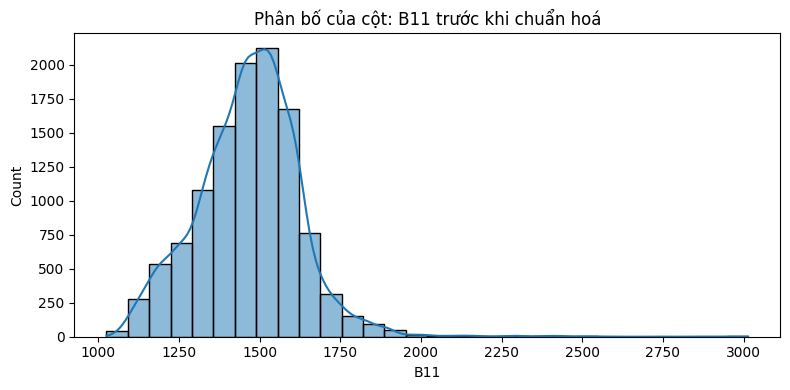

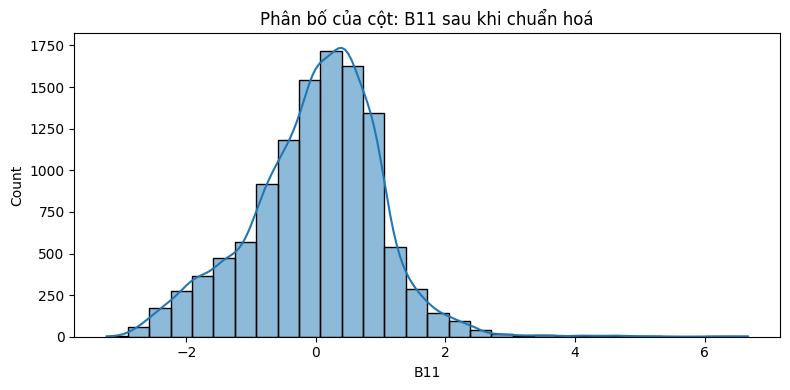

In [13]:
scale_pl = Pipeline([
    ("log", FunctionTransformer(np.log1p, validate=True)),
    ("scaler", StandardScaler()),
])
df_visualize = train_df.copy()
plt.figure(figsize=(8, 4)) 
sns.histplot(df_visualize['B1'].dropna(), bins=30, kde=True)
plt.xlabel('B11')
plt.title("Phân bố của cột: B11 trước khi chuẩn hoá")
plt.tight_layout()
plt.show() 
df_visualize['B1'] = scale_pl.fit_transform(df_visualize[['B1']])
plt.figure(figsize=(8, 4)) 
sns.histplot(df_visualize['B1'].dropna(), bins=30, kde=True)
plt.xlabel('B11')
plt.title("Phân bố của cột: B11 sau khi chuẩn hoá")
plt.tight_layout()
plt.show() 

## Hàm hỗ trợ train và đánh giá model

Nếu `scale=True` => chuẩn hoá dữ liệu trước khi train

Nếu `add_ft=True` => add các feature từ bước feature engineering

In [14]:
def train_and_evaluate(model, scale=False, add_ft=False):
    X_train, X_test, y_train, y_test = gen_train_test(train_df, test_df)
    if add_ft:
       X_train, X_test, y_train, y_test = gen_train_test(add_features(train_df), add_features(test_df)) 
    if scale:
        X_train, X_test = apply_scale_pl(X_train, X_test)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    display_result(y_test, y_pred, model)

## SVC

📊 Evaluation Metrics:
Accuracy : 0.8189473684210526
Precision: 0.8302788494439161
Recall   : 0.8189473684210526
F1 Score : 0.8056412649824305

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       240
           1       0.72      0.62      0.67       120
           2       0.63      0.86      0.73       420
           3       0.87      0.93      0.90       430
           4       0.81      0.44      0.57       150
           5       0.89      0.90      0.89       430
           6       0.92      0.92      0.92       440
           7       0.86      0.90      0.88       440
           8       1.00      0.09      0.16        80
           9       0.73      0.35      0.47       100

    accuracy                           0.82      2850
   macro avg       0.83      0.69      0.70      2850
weighted avg       0.83      0.82      0.81      2850



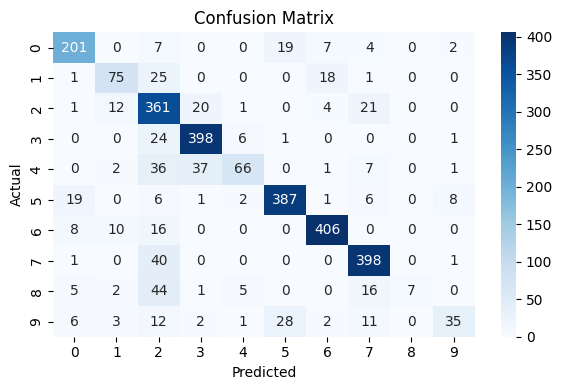

In [15]:
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict

X_train, X_test, y_train, y_test = gen_train_test(train_df, test_df)
X_train, X_test = apply_scale_pl(X_train, X_test)

model = svm.SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
display_result(y_test, y_pred, model)

📊 Evaluation Metrics:
Accuracy : 0.8189473684210526
Precision: 0.8302788494439161
Recall   : 0.8189473684210526
F1 Score : 0.8056412649824305

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       240
           1       0.72      0.62      0.67       120
           2       0.63      0.86      0.73       420
           3       0.87      0.93      0.90       430
           4       0.81      0.44      0.57       150
           5       0.89      0.90      0.89       430
           6       0.92      0.92      0.92       440
           7       0.86      0.90      0.88       440
           8       1.00      0.09      0.16        80
           9       0.73      0.35      0.47       100

    accuracy                           0.82      2850
   macro avg       0.83      0.69      0.70      2850
weighted avg       0.83      0.82      0.81      2850



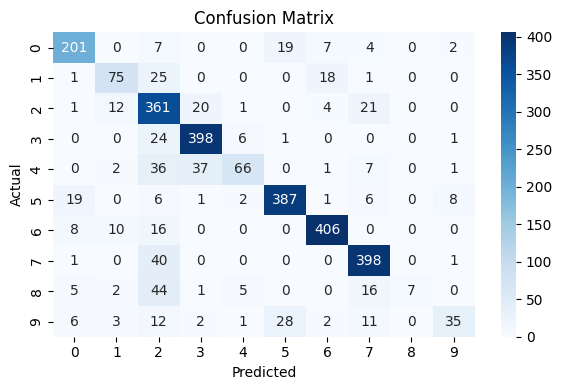

In [16]:
train_and_evaluate(svm.SVC(), scale=True)

## SVC RFE

**NOTE**: Không thể áp dụng với RFE lên SVC có kernel là RBF vì nó không cung cấp thuộc tính `coef_` và `feature_importances_`

## SVC Tuning

In [17]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import uniform
# param_dist = {
#     'C': uniform(0.1, 100),  
#     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
#     'gamma': ['scale', 'auto']
# }
# svc = svm.SVC()
# random_search = RandomizedSearchCV(svc, param_dist, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
# X_train, X_test, y_train, y_test = gen_train_test(train_df, test_df)
# X_train, X_test = apply_scale_pl(X_train, X_test)
# random_search.fit(X_train, y_train)
# print("Best parameters:", random_search.best_params_)
# print("Best cross-validation accuracy:", random_search.best_score_)

📊 Evaluation Metrics:
Accuracy : 0.8631578947368421
Precision: 0.8585730857284819
Recall   : 0.8631578947368421
F1 Score : 0.8555305024545419

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88       240
           1       0.79      0.76      0.77       120
           2       0.73      0.88      0.80       420
           3       0.93      0.92      0.92       430
           4       0.72      0.69      0.71       150
           5       0.92      0.91      0.91       430
           6       0.96      0.95      0.95       440
           7       0.91      0.94      0.92       440
           8       0.56      0.12      0.20        80
           9       0.70      0.53      0.60       100

    accuracy                           0.86      2850
   macro avg       0.81      0.76      0.77      2850
weighted avg       0.86      0.86      0.86      2850



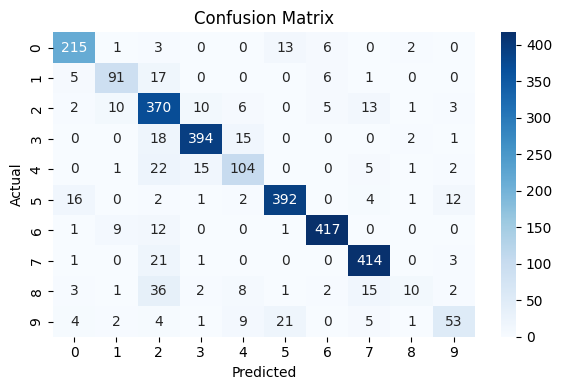

In [18]:
# train_and_evaluate(svm.SVC(**random_search.best_params_), scale=True, add_ft=True)
svc_best_params = {'C': 96.66320330745593, 'gamma': 'auto', 'kernel': 'rbf'}
train_and_evaluate(svm.SVC(**svc_best_params), scale=True, add_ft=True)

## Random Forest

📊 Evaluation Metrics:
Accuracy : 0.8691228070175439
Precision: 0.8677218197567964
Recall   : 0.8691228070175439
F1 Score : 0.861283107084634

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       240
           1       0.86      0.89      0.87       120
           2       0.76      0.90      0.82       420
           3       0.90      0.93      0.91       430
           4       0.80      0.63      0.71       150
           5       0.90      0.90      0.90       430
           6       0.95      0.95      0.95       440
           7       0.89      0.95      0.92       440
           8       0.76      0.20      0.32        80
           9       0.77      0.51      0.61       100

    accuracy                           0.87      2850
   macro avg       0.85      0.77      0.79      2850
weighted avg       0.87      0.87      0.86      2850



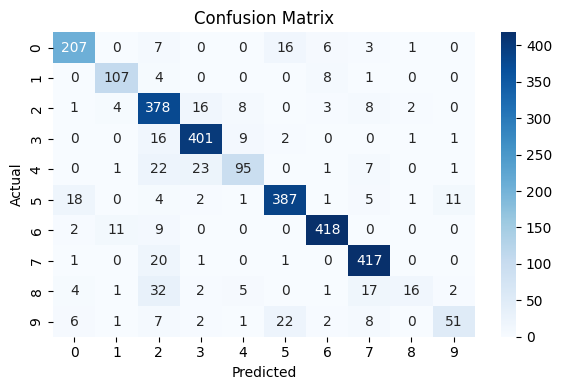

In [19]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = gen_train_test(train_df,test_df)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
display_result(y_test, y_pred, model)

## Random Forest RFE

In [20]:
from sklearn.feature_selection import RFE
X_train, X_test, y_train, y_test = gen_train_test(train_df, test_df)
# X_train,X_test=apply_scale_pl(X_train, X_test)
model = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
print("Selected features:")
print(selected_features)

Selected features:
Index(['B1', 'B3', 'B4', 'B5', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12'], dtype='object')


📊 Evaluation Metrics:
Accuracy : 0.8614035087719298
Precision: 0.8548562844549904
Recall   : 0.8614035087719298
F1 Score : 0.8535262802464285

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84       240
           1       0.86      0.86      0.86       120
           2       0.76      0.90      0.82       420
           3       0.89      0.93      0.91       430
           4       0.79      0.61      0.69       150
           5       0.90      0.90      0.90       430
           6       0.95      0.95      0.95       440
           7       0.90      0.95      0.92       440
           8       0.54      0.19      0.28        80
           9       0.68      0.47      0.56       100

    accuracy                           0.86      2850
   macro avg       0.81      0.76      0.77      2850
weighted avg       0.85      0.86      0.85      2850



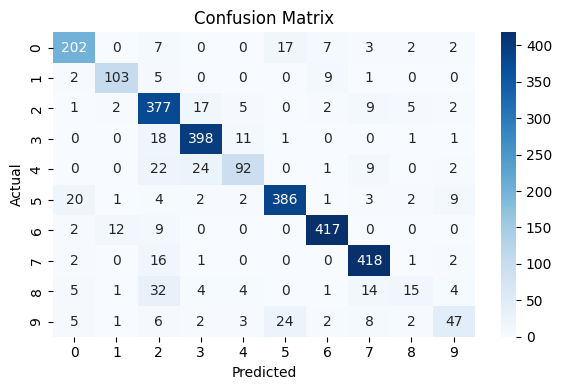

In [21]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
X_train, X_test, y_train, y_test = gen_train_test(train_df,test_df)
X_train=X_train[selected_features]
X_test=X_test[selected_features]
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
display_result(y_test, y_pred, model)

## Random Forest Tuning

In [22]:
# from scipy.stats import randint
# param_dist = {
#     'n_estimators': randint(100, 1000),
#     'max_depth': [None, 10, 20, 30, 50],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2'],
#     'bootstrap': [True, False]
# }
# rf = RandomForestClassifier(random_state=42)
# random_search = RandomizedSearchCV(
#     rf, param_distributions=param_dist,
#     n_iter=30, cv=5, scoring='accuracy',
#     n_jobs=-1, random_state=42
# )
# X_train, X_test, y_train, y_test = gen_train_test(train_df,test_df)
# random_search.fit(X_train, y_train)
# print("Best params:", random_search.best_params_)
# print("Best CV score:", random_search.best_score_)

📊 Evaluation Metrics:
Accuracy : 0.8729824561403509
Precision: 0.8685947566552391
Recall   : 0.8729824561403509
F1 Score : 0.8662529005919432

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       240
           1       0.87      0.89      0.88       120
           2       0.77      0.90      0.83       420
           3       0.90      0.93      0.91       430
           4       0.82      0.67      0.74       150
           5       0.91      0.91      0.91       430
           6       0.96      0.95      0.95       440
           7       0.89      0.95      0.92       440
           8       0.59      0.21      0.31        80
           9       0.80      0.55      0.65       100

    accuracy                           0.87      2850
   macro avg       0.84      0.78      0.80      2850
weighted avg       0.87      0.87      0.87      2850



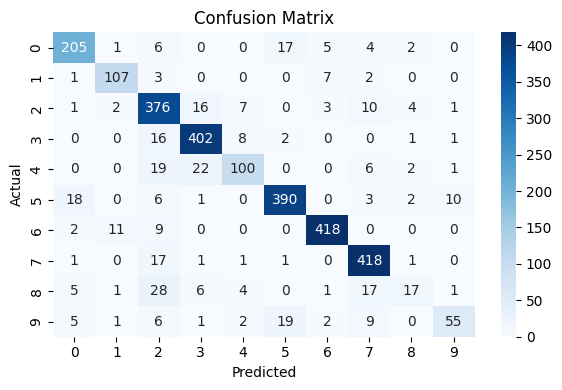

In [23]:
# best_rf = RandomForestClassifier(**random_search.best_params_)
# train_and_evaluate(best_rf)

rf_best_params = {'bootstrap': False, 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 256}
best_rf = RandomForestClassifier(**rf_best_params)
train_and_evaluate(best_rf)

### Thử nghiệm RFE_CV

Warning: chạy tương đối lâu

In [24]:
# from yellowbrick.model_selection import RFECV
# X_train, X_test, y_train, y_test = gen_train_test()
# visualizer = RFECV(RandomForestClassifier(n_estimators=100, random_state=42)) 
# visualizer.fit(X_train, y_train)
# visualizer.show()

### Thử nghiệm xử lý label không đáng tin
Giảm trọng số của class "shrubland", 

In [25]:
from sklearn.utils.class_weight import compute_class_weight
classes=np.unique(train_df['label'])
class_weights = compute_class_weight('balanced', classes=classes, y=train_df['label'])
print(dict(zip(classes, class_weights)))

{0: 1.1875, 1: 2.375, 2: 0.6785714285714286, 3: 0.6627906976744186, 4: 1.9, 5: 0.6627906976744186, 6: 0.6477272727272727, 7: 0.6477272727272727, 8: 3.5625, 9: 2.85}


số 8 có accuracy thấp nhất (chính là shrubland đang nghi ngờ do label sai) 

=> không tin tưởng thì giảm trọng số của nó một nửa

In [26]:
custom_weights=dict(zip(classes, class_weights))
custom_weights[8] *= 0.2

📊 Evaluation Metrics:
Accuracy : 0.8666666666666667
Precision: 0.8596766363632833
Recall   : 0.8666666666666667
F1 Score : 0.8582142594023457

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       240
           1       0.89      0.84      0.87       120
           2       0.77      0.90      0.83       420
           3       0.89      0.93      0.91       430
           4       0.81      0.63      0.71       150
           5       0.90      0.90      0.90       430
           6       0.94      0.95      0.94       440
           7       0.89      0.96      0.92       440
           8       0.52      0.17      0.26        80
           9       0.73      0.47      0.57       100

    accuracy                           0.87      2850
   macro avg       0.82      0.76      0.78      2850
weighted avg       0.86      0.87      0.86      2850



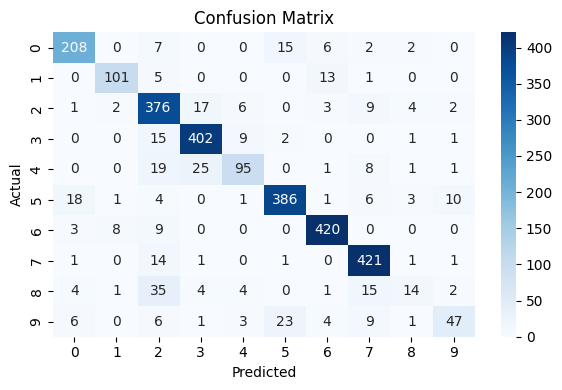

In [27]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
X_train, X_test, y_train, y_test = gen_train_test(train_df,test_df)
# X_train=X_train[selected_features]
# X_test=X_test[selected_features]
model = RandomForestClassifier(n_estimators=100, random_state=42,class_weight=custom_weights)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
display_result(y_test, y_pred, model)

Kết quả tăng lên không đáng kể, cần phải investigate thêm

một số thứ có thể làm:
- vẽ các plot liên quan đến label này
- tạo một model riêng để phân biệt shrubland vs non-shrubland
- áp dụng confidence-based filtering

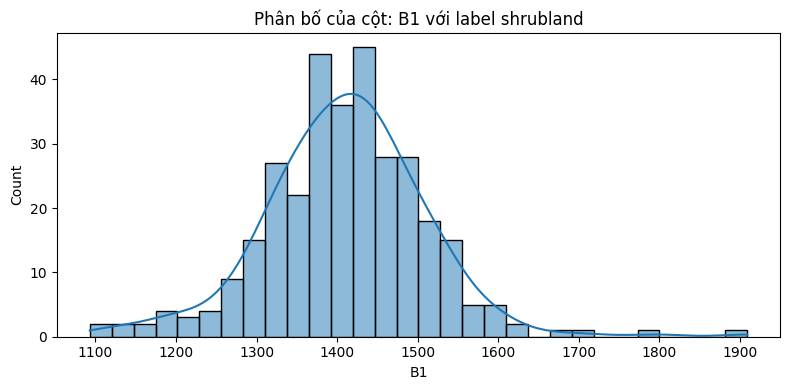

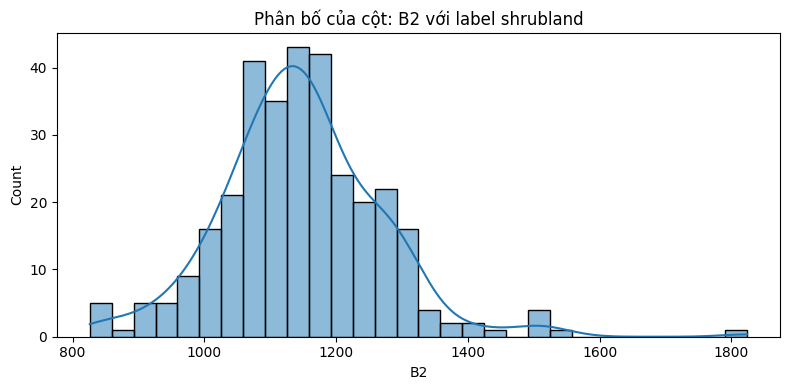

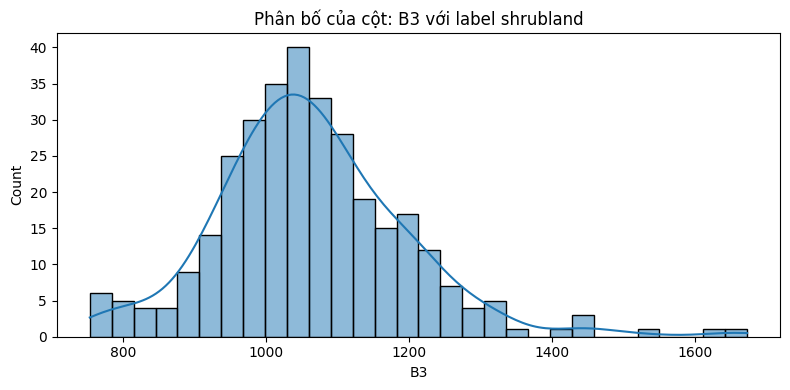

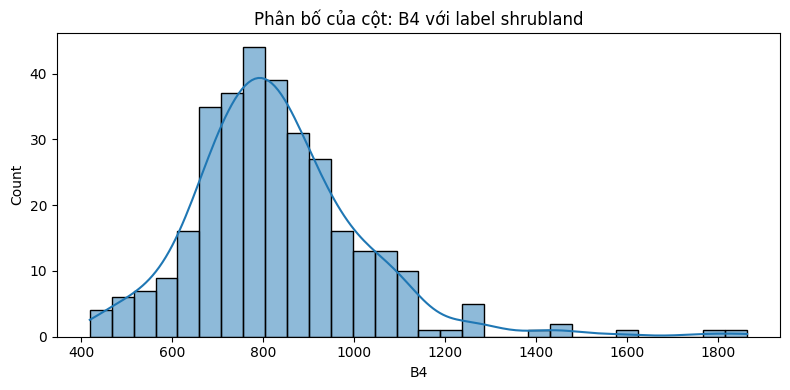

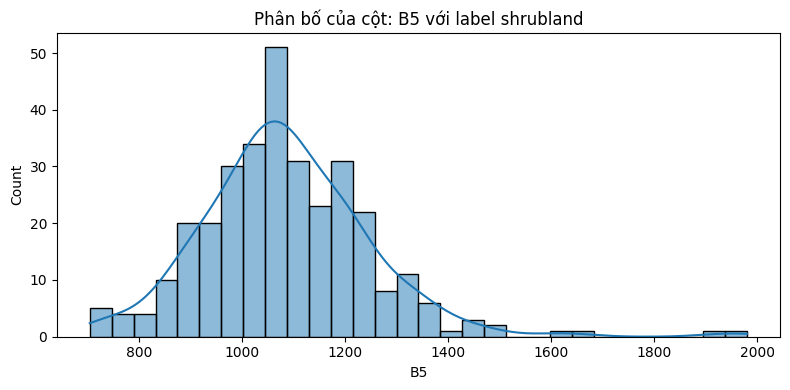

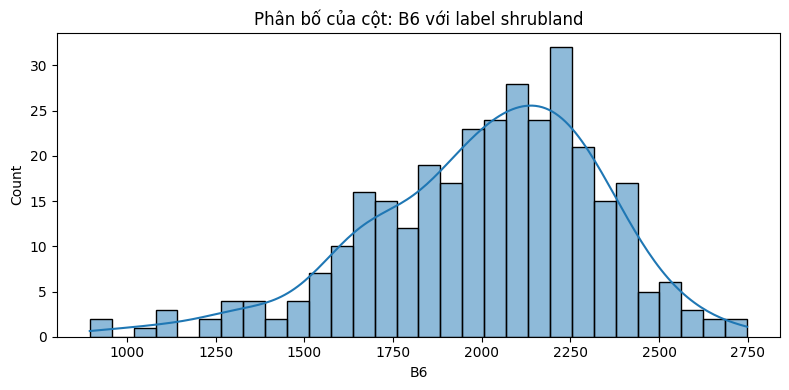

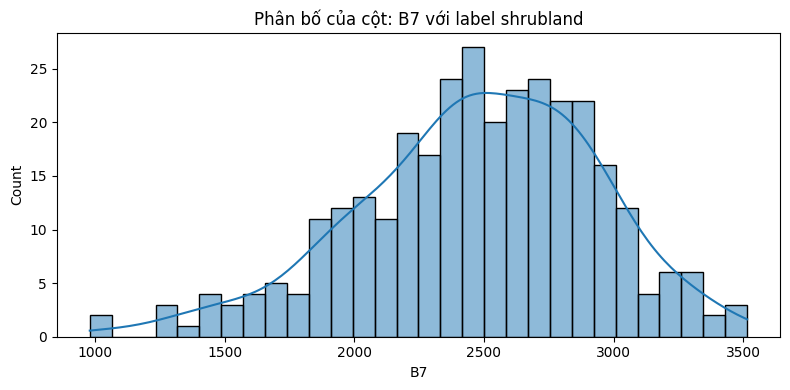

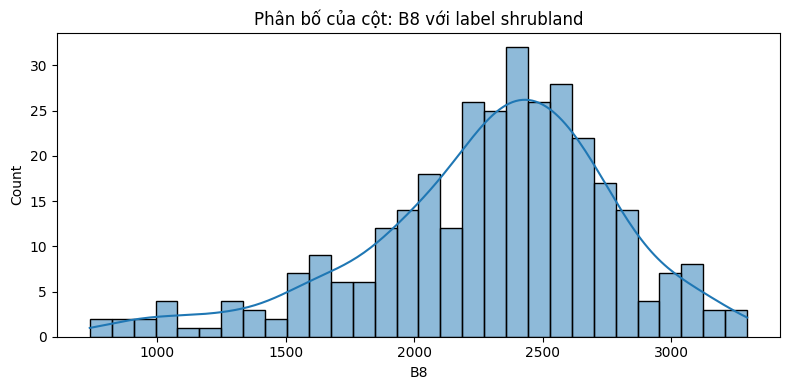

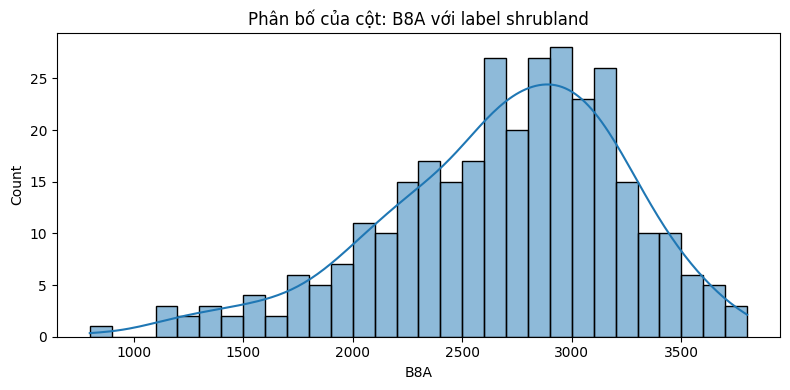

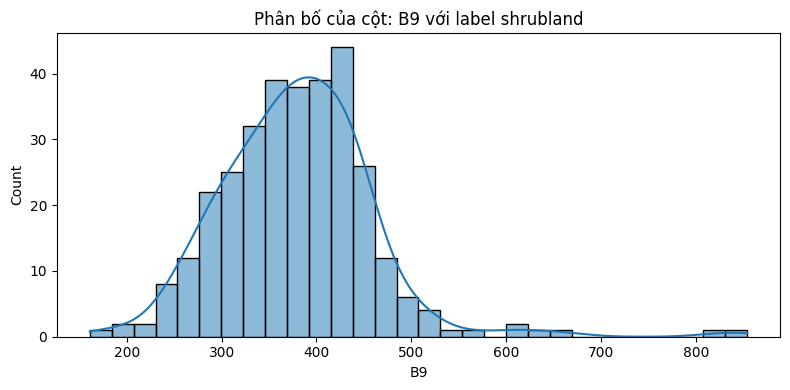

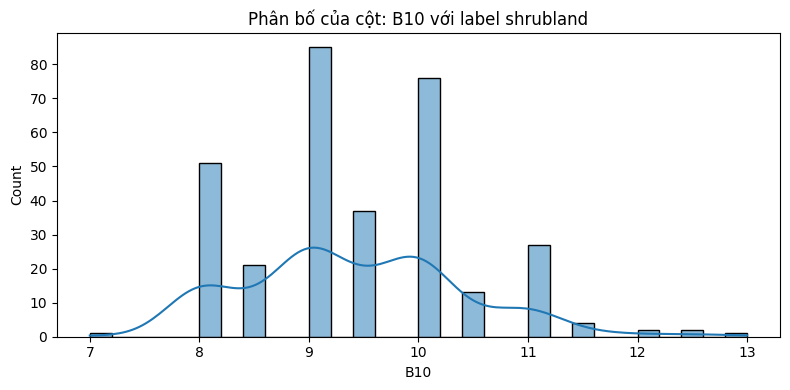

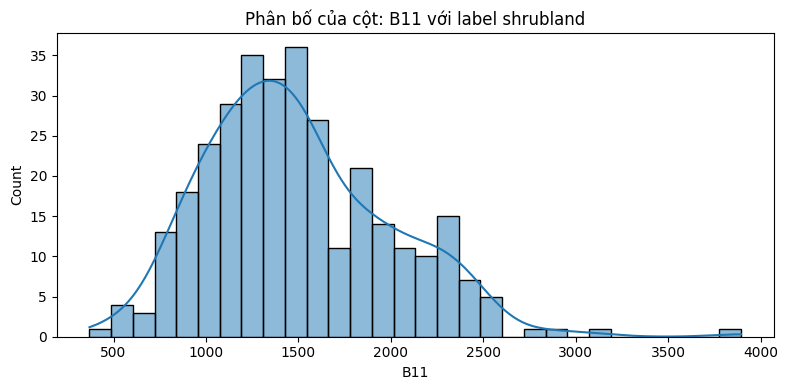

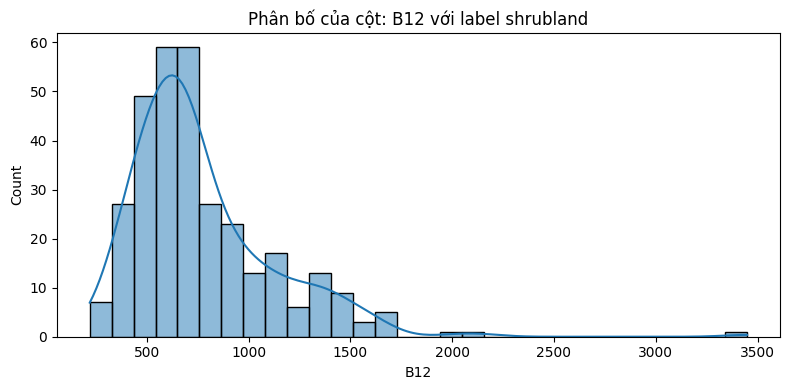

In [28]:
df_train_shrub = backup_train_df[train_df['label'] == 8]
for ft in df_train_shrub.columns:
    if ft == 'label':
        continue
    plt.figure(figsize=(8, 4))  
    sns.histplot(df_train_shrub[ft].dropna(), bins=30, kde=True)
    plt.xlabel(ft)
    plt.title(f"Phân bố của cột: {ft} với label shrubland")
    plt.tight_layout()
    plt.show() 

In [29]:
df_train_target_shrub = backup_train_df.copy()
df_train_target_shrub['label_binary'] = df_train_target_shrub['label'].apply(lambda x: 1 if x == 8 else 0)

df_test_target_shrub = backup_test_df.copy()
df_test_target_shrub['label_binary'] = df_test_target_shrub['label'].apply(lambda x: 1 if x == 8 else 0)

In [30]:
from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(df_train_target_shrub.drop(columns=['label_binary']), df_train_target_shrub['label_binary'], stratify=df_train_target_shrub['label'], random_state=42)
X_train,y_train = df_train_target_shrub.drop(columns=['label_binary', 'label']), df_train_target_shrub['label_binary']
X_test,y_test = df_test_target_shrub.drop(columns=['label_binary', 'label']), df_test_target_shrub['label_binary']
# X_train,X_test = apply_scale_pl(X_train,X_test)

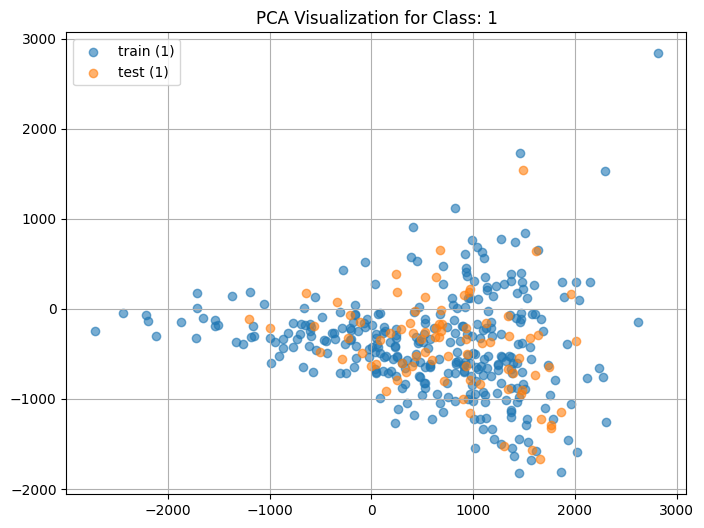

In [31]:
from sklearn.decomposition import PCA

def plot_pca_train_test(X_train, X_test, y_train, y_test, target_class=1):
    X_all = np.vstack([X_train, X_test])
    y_all = np.hstack([y_train, y_test])
    domain = np.array(["train"] * len(X_train) + ["test"] * len(X_test))

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_all)

    df_plot = pd.DataFrame({
        "PC1": X_pca[:, 0],
        "PC2": X_pca[:, 1],
        "label": y_all,
        "domain": domain
    })

    fig, ax = plt.subplots(figsize=(8, 6))
    for split in ["train", "test"]:
        subset = df_plot[(df_plot["label"] == target_class) & (df_plot["domain"] == split)]
        ax.scatter(subset["PC1"], subset["PC2"], label=f"{split} ({target_class})", alpha=0.6)

    ax.set_title(f'PCA Visualization for Class: {target_class}')
    ax.legend()
    plt.grid(True)
    plt.show()

plot_pca_train_test(X_train,X_test,y_train,y_test)

📊 Evaluation Metrics:
Accuracy : 0.9719298245614035
Precision: 0.9446475838719606
Recall   : 0.9719298245614035
F1 Score : 0.958094524567647

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2770
           1       0.00      0.00      0.00        80

    accuracy                           0.97      2850
   macro avg       0.49      0.50      0.49      2850
weighted avg       0.94      0.97      0.96      2850



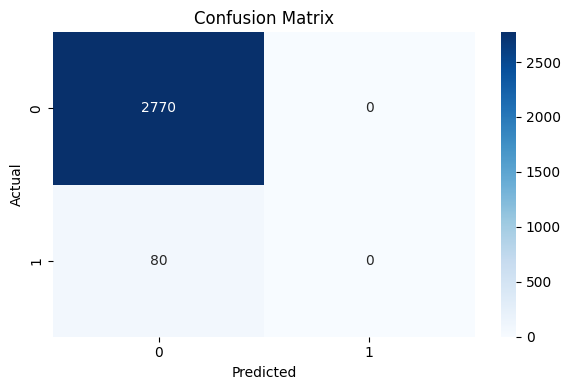

In [32]:
from sklearn import svm
binary_model = svm.SVC(kernel='rbf', C=100, gamma='auto',probability=True)
binary_model.fit(X_train,y_train)
y_pred=binary_model.predict(X_test)
y_prob=binary_model.predict_proba(X_test)[:,1]
display_result(y_test, y_pred, binary_model)

In [33]:
# SVC gốc
from sklearn import svm

X_train, X_test, y_train, y_test = gen_train_test(train_df,test_df)
X_train, X_test = apply_scale_pl(X_train, X_test)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

full_pred_model = svm.SVC(kernel='rbf', C=100, gamma='auto')
full_pred_model.fit(X_train,y_train)

SVC(C=100, gamma='auto')

## XGBoost

📊 Evaluation Metrics:
Accuracy : 0.8512280701754386
Precision: 0.846480775105926
Recall   : 0.8512280701754386
F1 Score : 0.8408105013016286

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86       240
           1       0.81      0.81      0.81       120
           2       0.73      0.86      0.79       420
           3       0.89      0.94      0.92       430
           4       0.75      0.57      0.65       150
           5       0.89      0.90      0.90       430
           6       0.93      0.93      0.93       440
           7       0.87      0.95      0.91       440
           8       0.64      0.11      0.19        80
           9       0.75      0.48      0.59       100

    accuracy                           0.85      2850
   macro avg       0.81      0.74      0.75      2850
weighted avg       0.85      0.85      0.84      2850



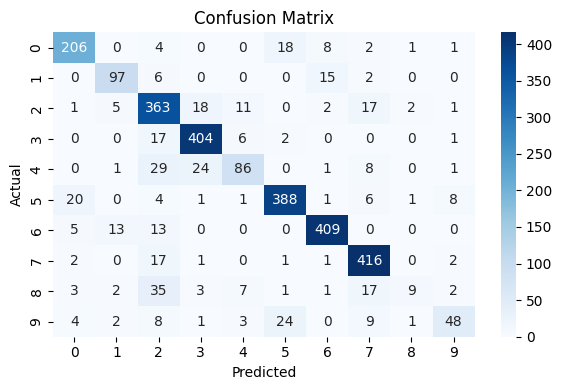

In [34]:
import xgboost as xgb
X_train, X_test, y_train, y_test = gen_train_test(train_df,test_df)
model = xgb.XGBClassifier(
    n_estimators=100,      
    max_depth=4,            
    learning_rate=0.1,   
    use_label_encoder=False,
    eval_metric='logloss'   
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
display_result(y_test, y_pred, model)

## XGBoost RFE


In [35]:
from sklearn.feature_selection import RFE
X_train, X_test, y_train, y_test = gen_train_test(train_df, test_df)
# X_train,X_test=apply_scale_pl(X_train, X_test)
model = xgb.XGBClassifier(
    n_estimators=100,      
    max_depth=4,            
    learning_rate=0.1,   
    use_label_encoder=False,
    eval_metric='logloss'   
)
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
print("Selected features:")
print(selected_features)

Selected features:
Index(['B1', 'B3', 'B4', 'B5', 'B6', 'B8', 'B8A', 'B9', 'B11', 'B12'], dtype='object')


📊 Evaluation Metrics:
Accuracy : 0.8501754385964913
Precision: 0.8461858519094698
Recall   : 0.8501754385964913
F1 Score : 0.8394872456297068

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85       240
           1       0.84      0.81      0.82       120
           2       0.73      0.87      0.79       420
           3       0.89      0.93      0.91       430
           4       0.79      0.57      0.66       150
           5       0.89      0.90      0.90       430
           6       0.94      0.94      0.94       440
           7       0.86      0.95      0.90       440
           8       0.67      0.10      0.17        80
           9       0.69      0.49      0.57       100

    accuracy                           0.85      2850
   macro avg       0.82      0.74      0.75      2850
weighted avg       0.85      0.85      0.84      2850



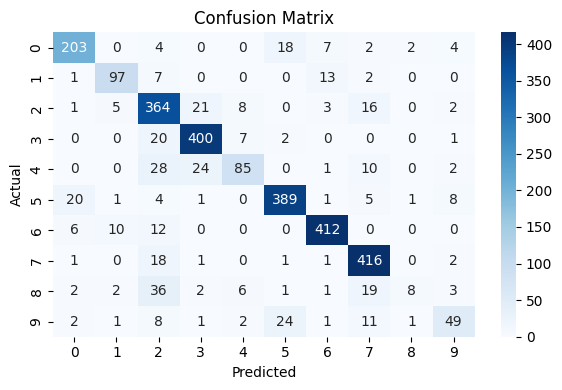

In [36]:
X_train, X_test, y_train, y_test = gen_train_test(train_df,test_df)
X_train=X_train[selected_features]
X_test=X_test[selected_features]
model = xgb.XGBClassifier(
    n_estimators=100,      
    max_depth=4,            
    learning_rate=0.1,   
    use_label_encoder=False,
    eval_metric='logloss'   
)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
display_result(y_test, y_pred, model)

## XGBoost Tuning

In [37]:
# import optuna
# optuna.logging.set_verbosity(optuna.logging.CRITICAL)
# from sklearn.model_selection import cross_val_score
# import xgboost as xgb
# X_train, X_test, y_train, y_test = gen_train_test(train_df,test_df)
# def objective(trial):
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 50, 200),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
#         'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
#         'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
#         'gamma': trial.suggest_uniform('gamma', 0, 1),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
#         'scale_pos_weight': trial.suggest_float('scale_pos_weight', 0.5, 5.0) # imbalanced data nên thêm tham số này
#     }

#     model = xgb.XGBClassifier(
#         use_label_encoder=False,
#         eval_metric='logloss',
#         **params
#     )
#     score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
#     return score.mean()

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=50)

# print("Best trial:")
# trial = study.best_trial
# print(f"  Accurscaacy: {trial.value}")
# print(f"  Params: {trial.params}")

📊 Evaluation Metrics:
Accuracy : 0.8740350877192983
Precision: 0.8674392725392669
Recall   : 0.8740350877192983
F1 Score : 0.8667308854962572

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       240
           1       0.84      0.86      0.85       120
           2       0.79      0.90      0.84       420
           3       0.91      0.93      0.92       430
           4       0.79      0.63      0.70       150
           5       0.90      0.91      0.91       430
           6       0.96      0.95      0.95       440
           7       0.90      0.96      0.93       440
           8       0.54      0.19      0.28        80
           9       0.71      0.55      0.62       100

    accuracy                           0.87      2850
   macro avg       0.82      0.78      0.79      2850
weighted avg       0.87      0.87      0.87      2850



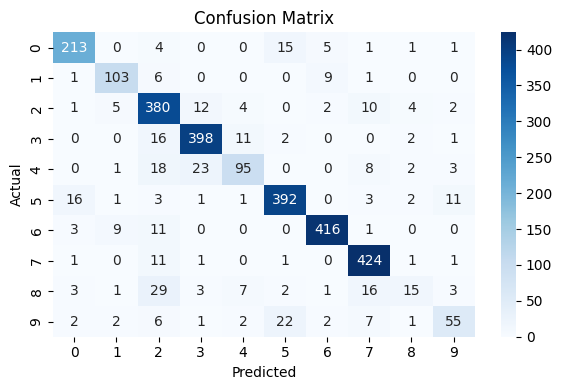

In [38]:
# best_params = study.best_trial.params
import xgboost as xgb
best_params = {'n_estimators': 162, 'max_depth': 10, 'learning_rate': 0.09183317367800949, 'subsample': 0.7915058024951583, 'colsample_bytree': 0.8768586530196948, 'gamma': 0.8890939989737939, 'min_child_weight': 3, 'scale_pos_weight': 3.3619170561169573}
best_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    **best_params
)

train_and_evaluate(best_model)

## Voting Classifier

📊 Evaluation Metrics:
Accuracy : 0.8750877192982456
Precision: 0.8716139988384829
Recall   : 0.8750877192982456
F1 Score : 0.8671435992462496

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       240
           1       0.91      0.89      0.90       120
           2       0.75      0.91      0.82       420
           3       0.91      0.93      0.92       430
           4       0.82      0.63      0.71       150
           5       0.91      0.91      0.91       430
           6       0.96      0.95      0.96       440
           7       0.91      0.96      0.93       440
           8       0.61      0.17      0.27        80
           9       0.76      0.52      0.62       100

    accuracy                           0.88      2850
   macro avg       0.84      0.78      0.79      2850
weighted avg       0.87      0.88      0.87      2850



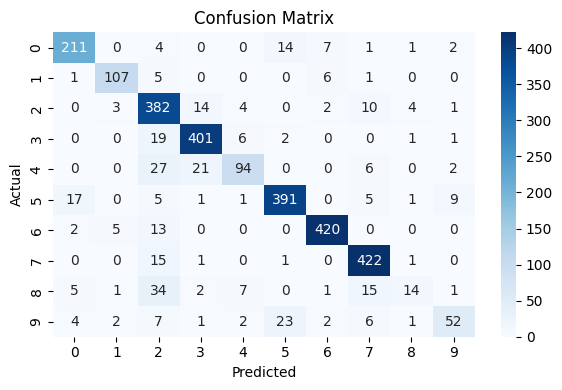

In [39]:
from sklearn.pipeline import make_pipeline
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

X_train, X_test, y_train, y_test = gen_train_test(train_df,test_df)

svc_model = svm.SVC(probability=True)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
)
voting_clf = VotingClassifier(
    estimators=[
        ('svc', svc_model),
        ('rf', rf_model),
        ('xgb', xgb_model)
    ],
    voting='soft'  
)
train_and_evaluate(voting_clf, scale=True)

## Voting Classifier (Đã tuning mô hình con)

📊 Evaluation Metrics:
Accuracy : 0.8821052631578947
Precision: 0.8770134161018451
Recall   : 0.8821052631578947
F1 Score : 0.874915062036847

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89       240
           1       0.89      0.89      0.89       120
           2       0.78      0.91      0.84       420
           3       0.92      0.93      0.92       430
           4       0.81      0.69      0.74       150
           5       0.91      0.92      0.92       430
           6       0.96      0.95      0.96       440
           7       0.91      0.96      0.93       440
           8       0.58      0.19      0.28        80
           9       0.76      0.54      0.63       100

    accuracy                           0.88      2850
   macro avg       0.84      0.79      0.80      2850
weighted avg       0.88      0.88      0.87      2850



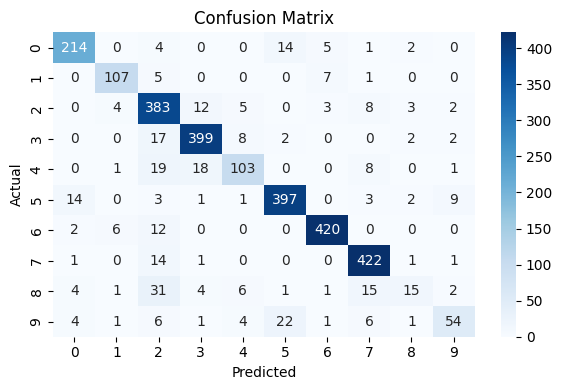

In [40]:
svc_best_params = {'C': 96.66320330745593, 'gamma': 'auto', 'kernel': 'rbf'}
svc_model = svm.SVC(**svc_best_params, probability=True)

rf_best_params = {'bootstrap': False, 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 256}
rf_model = RandomForestClassifier(**rf_best_params)

xgb_best_params = {'n_estimators': 162, 'max_depth': 10, 'learning_rate': 0.09183317367800949, 'subsample': 0.7915058024951583, 'colsample_bytree': 0.8768586530196948, 'gamma': 0.8890939989737939, 'min_child_weight': 3, 'scale_pos_weight': 3.3619170561169573}
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    **xgb_best_params
)

voting_clf = VotingClassifier(
    estimators=[
        ('svc', svc_model),
        ('rf', rf_model),
        ('xgb', xgb_model)
    ],
    voting='soft'  
)
train_and_evaluate(voting_clf, scale=True)

## Voting Classifier (Tuning mô hình con + Tuning voting weight)

In [41]:
# from sklearn.model_selection import RandomizedSearchCV

# svc_best_params = {'C': 96.66320330745593, 'gamma': 'auto', 'kernel': 'rbf', probability=True}
# svc_model = svm.SVC(**svc_best_params)

# rf_best_params = {'bootstrap': False, 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 256}
# rf_model = RandomForestClassifier(**rf_best_params)

# xgb_best_params = {'n_estimators': 162, 'max_depth': 10, 'learning_rate': 0.09183317367800949, 'subsample': 0.7915058024951583, 'colsample_bytree': 0.8768586530196948, 'gamma': 0.8890939989737939, 'min_child_weight': 3, 'scale_pos_weight': 3.3619170561169573}
# xgb_model = xgb.XGBClassifier(
#     use_label_encoder=False,
#     eval_metric='logloss',
#     **xgb_best_params
# )

# param_dist = {
#     'weights': [
#         [uniform.rvs(loc=1, scale=4) for _ in range(3)]  # Tạo 3 trọng số ngẫu nhiên cho mỗi mô hình con
#         for _ in range(100)  # 100 tổ hợp trọng số ngẫu nhiên
#     ]
# }
# voting_clf = VotingClassifier(
#     estimators=[
#         ('svc', svc_model),
#         ('rf', rf_model),
#         ('xgb', xgb_model)
#     ],
#     voting='soft'  
# )
# search = RandomizedSearchCV(
#     estimator=voting_clf,
#     param_distributions=param_dist,
#     n_iter=50,    
#     cv=5,
#     scoring='accuracy',
#     random_state=42,
#     n_jobs=-1
# )
# X_train,X_test,y_train,y_test=gen_train_test(train_df,test_df)
# X_train,X_test=apply_scale_pl(X_train,X_test)
# search.fit(X_train, y_train)
# print("Best voting weights:", search.best_params_['weights'])
# print("Best CV accuracy:", search.best_score_)

📊 Evaluation Metrics:
Accuracy : 0.8775438596491228
Precision: 0.8715060934455883
Recall   : 0.8775438596491228
F1 Score : 0.8694054882479165

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       240
           1       0.88      0.88      0.88       120
           2       0.79      0.91      0.85       420
           3       0.90      0.93      0.92       430
           4       0.79      0.62      0.70       150
           5       0.90      0.92      0.91       430
           6       0.96      0.95      0.95       440
           7       0.89      0.96      0.93       440
           8       0.60      0.19      0.29        80
           9       0.75      0.53      0.62       100

    accuracy                           0.88      2850
   macro avg       0.84      0.78      0.79      2850
weighted avg       0.87      0.88      0.87      2850



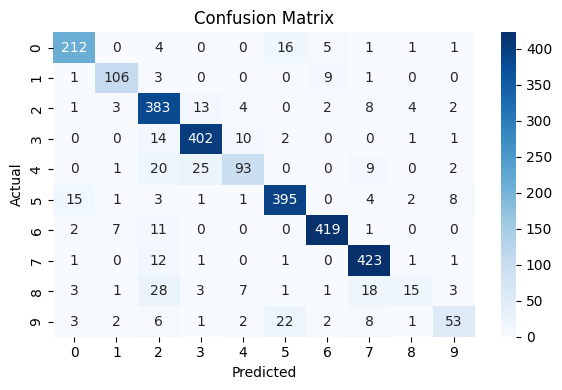

In [42]:
svc_best_params = {'C': 96.66320330745593, 'gamma': 'auto', 'kernel': 'rbf'}
svc_model = svm.SVC(**svc_best_params, probability=True)

rf_best_params = {'bootstrap': False, 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 256}
rf_model = RandomForestClassifier(**rf_best_params)

xgb_best_params = {'n_estimators': 162, 'max_depth': 10, 'learning_rate': 0.09183317367800949, 'subsample': 0.7915058024951583, 'colsample_bytree': 0.8768586530196948, 'gamma': 0.8890939989737939, 'min_child_weight': 3, 'scale_pos_weight': 3.3619170561169573}
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    **xgb_best_params
)

voting_clf = VotingClassifier(
    estimators=[
        ('svc', svc_model),
        ('rf', rf_model),
        ('xgb', xgb_model)
    ],
    voting='soft',
    weights=[3, 2, 5],
    n_jobs=-1
)
train_and_evaluate(voting_clf)

## Deep Learning

In [43]:
import torch
import torch.nn as nn
import torch.nn.functional as F
X_train, X_test, y_train, y_test = gen_train_test(train_df,test_df)
class MLPClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.out = nn.Linear(32, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.out(x)

In [44]:
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import TensorDataset, DataLoader


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64)

In [45]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLPClassifier(input_dim=X_train.shape[1], num_classes=len(set(y_train))).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

for epoch in range(20):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

Epoch 1, Loss: 240.5782
Epoch 2, Loss: 152.5673
Epoch 3, Loss: 135.2281
Epoch 4, Loss: 125.7194
Epoch 5, Loss: 119.5635
Epoch 6, Loss: 113.2300
Epoch 7, Loss: 110.3450
Epoch 8, Loss: 106.1578
Epoch 9, Loss: 103.4892
Epoch 10, Loss: 101.5964
Epoch 11, Loss: 98.7588
Epoch 12, Loss: 97.1234
Epoch 13, Loss: 95.7058
Epoch 14, Loss: 94.4455
Epoch 15, Loss: 93.0084
Epoch 16, Loss: 92.0979
Epoch 17, Loss: 91.1960
Epoch 18, Loss: 90.5086
Epoch 19, Loss: 89.2322
Epoch 20, Loss: 88.4995


In [46]:
model.eval()
with torch.no_grad():
    y_pred = []
    for xb, _ in test_loader:
        xb = xb.to(device)
        logits = model(xb)
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        y_pred.extend(preds)
display_result(y_test, y_pred, model)

📊 Evaluation Metrics:
Accuracy : 0.8228070175438597
Precision: 0.8145368890751038
Recall   : 0.8228070175438597
F1 Score : 0.8114780893257905

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       240
           1       0.75      0.68      0.71       120
           2       0.70      0.80      0.75       420
           3       0.85      0.95      0.89       430
           4       0.71      0.45      0.55       150
           5       0.88      0.85      0.87       430
           6       0.93      0.94      0.94       440
           7       0.87      0.92      0.90       440
           8       0.53      0.10      0.17        80
           9       0.60      0.48      0.53       100

    accuracy                           0.82      2850
   macro avg       0.76      0.71      0.71      2850
weighted avg       0.81      0.82      0.81      2850



AttributeError: 'MLPClassifier' object has no attribute 'classes_'

<Figure size 600x400 with 0 Axes>

## K-nn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = gen_train_test(train_df,test_df)
X_train, X_test = apply_scale_pl(X_train, X_test)
knn = KNeighborsClassifier(n_neighbors=4, weights='distance') # Thêm distance vào tăng 0.01 accuracy
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
display_result(y_test,y_pred,knn)